In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

In [18]:
# Load dataset
df_train = pd.read_csv("filtered_fever_data.csv")

In [19]:
# Splitting dataset
X = df_train['claim']
y = df_train['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Convert labels to numerical format
label_mapping = {"SUPPORTS": 0, "REFUTES": 1}
y_train = y_train.map(label_mapping)
y_test = y_test.map(label_mapping)

In [21]:
# Text Vectorization 
vectorizer = TfidfVectorizer(stop_words='english', max_features=10000) # variation 4
#vectorizer = TfidfVectorizer(stop_words='english', max_features=15 - variation 2
#vectorizer = TfidfVectorizer(stop_words='english', max_features=500) - variation 3
#vectorizer = TfidfVectorizer(stop_words='english', max_features=5000) - baseline

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [22]:
# Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train_tfidf, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [23]:
# Predictions
predictions = model.predict(X_test_tfidf)

In [24]:
# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
precision = metrics.precision_score(y_test, predictions)
recall = metrics.recall_score(y_test, predictions)
f1_score =  metrics.f1_score(y_test, predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F-measure:", f1_score)

Accuracy: 0.762589928057554
Precision: 0.6077044025157232
Recall: 0.3841948310139165
F-measure: 0.4707673568818514


In [25]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85     15926
           1       0.61      0.38      0.47      6036

    accuracy                           0.76     21962
   macro avg       0.70      0.65      0.66     21962
weighted avg       0.74      0.76      0.74     21962



In [26]:
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

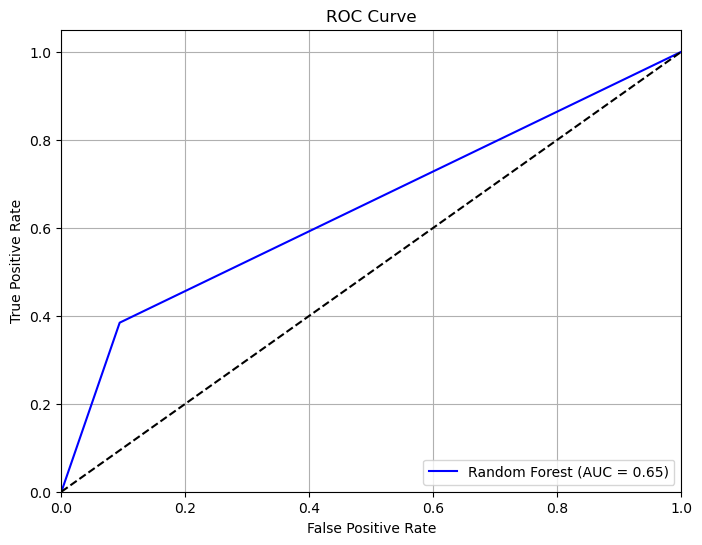

In [27]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

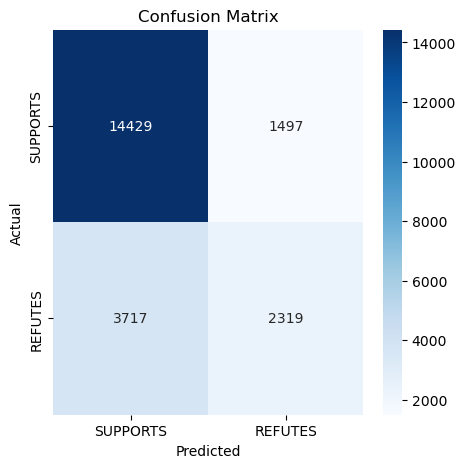

In [28]:
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()